In [1]:
import os

os.chdir("../data/imtest/")

In [2]:
import numpy as np
#import laspy as lp
import open3d as o3d
#import pye57
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from skimage import morphology
from PIL import Image, ImageOps
from scipy import spatial
import laspy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
import laspy

las = laspy.read('traincloudtest.las')
print(np.unique(las.classification))

[0]


In [4]:
for dimension in las.point_format.dimensions:
    print(dimension.name)

X
Y
Z
intensity
return_number
number_of_returns
scan_direction_flag
edge_of_flight_line
classification
synthetic
key_point
withheld
scan_angle_rank
user_data
point_source_id
red
green
blue


In [5]:
pcd = o3d.geometry.PointCloud()

In [6]:
points = np.vstack((las.x, las.y, las.z)).transpose()
pcd.points = o3d.utility.Vector3dVector(points)

In [7]:
#pcd = o3d.io.read_point_cloud("OneDrive_1_09-03-2022/subsamples/SGE01.pcd")





In [8]:
o3d.visualization.draw_geometries([pcd])

In [9]:
pcd

PointCloud with 1112805 points.

In [10]:
#pcd_bbox.color = [0,0,0]

In [11]:
#points = o3d.utility.Vector3dVector(xyz)

In [12]:
#o3d_bbox = o3d.geometry.OrientedBoundingBox.create_from_points(points)
pcd_bbox=o3d.geometry.Geometry3D.get_oriented_bounding_box(pcd)

In [13]:
#A = open3d.visualization.rendering.Camera
#o3d.visualization.draw_geometries([pcd,pcd_bbox])


In [14]:
pcd_bbox

OrientedBoundingBox: center: (375776, 165056, 32.055), extent: 6.63697, 3.67064, 0.318279)

In [15]:
R=pcd_bbox.R

In [16]:
R

array([[ 0.03936969, -0.99920922,  0.00556367],
       [ 0.99922247,  0.03938078,  0.0018974 ],
       [-0.002115  ,  0.00548464,  0.99998272]])

In [17]:
theta =  math.asin(-R[2,0])

In [18]:
theta

0.002115003007171152

In [19]:
#phi = R[2,1]

In [20]:
psi = math.asin((R[1,0])/(math.cos(theta)))

In [21]:
R2d = [[math.cos(-psi),-math.sin(-psi), 0], [math.sin(-psi), math.cos(-psi), 0],[0,0,1]]

In [22]:
pcdc = o3d.geometry.Geometry3D.translate(pcd, -pcd_bbox.center)

In [23]:
pcd_bbox.extent

array([6.63696662, 3.67063517, 0.31827926])

In [24]:
pcdc = o3d.geometry.Geometry3D.rotate(pcdc, R2d)

In [25]:
pcdc_bbox=o3d.geometry.Geometry3D.get_oriented_bounding_box(pcdc)

In [26]:
pcdc_bbox

OrientedBoundingBox: center: (-0.168705, 0.00878052, -1.15688e-06), extent: 6.63691, 3.67052, 0.318281)

In [27]:
pcdc_bbox.R

array([[ 9.99997763e-01,  7.12236958e-06, -2.11505618e-03],
       [ 1.87253389e-05, -9.99984952e-01,  5.48592265e-03],
       [-2.11498528e-03, -5.48594998e-03, -9.99982715e-01]])

In [28]:
xyz = np.asarray(pcdc.points)

In [29]:
xyzorientN = xyz[xyz[:,0]>0]
xyzorientNE = xyzorientN[xyzorientN[:,1]>0]

In [30]:

xyzorientNW = xyzorientN[xyzorientN[:,1]<0]

In [31]:
xyzorientS = xyz[xyz[:,0]<0]
xyzorientSE = xyzorientS[xyzorientS[:,1]>0]

In [32]:
xyzorientSW = xyzorientS[xyzorientS[:,1]<0]

In [33]:
xyzorientNE1 = (xyzorientNE[:,[0]]**2)+(xyzorientNE[:,[1]]**2)
xyzorientSE1 = (xyzorientSE[:,[0]]**2)+(xyzorientSE[:,[1]]**2)
xyzorientNW1 = (xyzorientNW[:,[0]]**2)+(xyzorientNW[:,[1]]**2)
xyzorientSW1 = (xyzorientSW[:,[0]]**2)+(xyzorientSW[:,[1]]**2)

In [34]:
indexNE = np.argmax(xyzorientNE1)
indexSE = np.argmax(xyzorientSE1)
indexNW = np.argmax(xyzorientNW1)
indexSW = np.argmax(xyzorientSW1)

In [35]:
theta2 = math.atan((xyzorientNE[indexNE,1]-xyzorientSE[indexSE,1])/(xyzorientNE[indexNE,0]-xyzorientSE[indexSE,0]))

In [36]:
theta3 = math.atan((xyzorientNW[indexNW,1]-xyzorientSW[indexSW,1])/(xyzorientNW[indexNW,0]-xyzorientSW[indexSW,0]))

In [37]:
print(theta2)
print(theta3)

0.050203642613267006
0.04966683740174052


In [38]:
math.pi

3.141592653589793

In [39]:
thetaf = (theta2+theta3)/2

In [40]:
thetaf*180/math.pi

2.8610785014027833

In [41]:
R22d = [[math.cos(-thetaf),-math.sin(-thetaf), 0], [math.sin(-thetaf), math.cos(-thetaf), 0],[0,0,1]]

In [42]:
pcdc2 = o3d.geometry.Geometry3D.rotate(pcdc, R22d)
o3d.io.write_point_cloud("brickflat2.pcd", pcdc2)

True

In [43]:
#o3d.io.write_point_cloud("copy_of_SGE01.pcd", pcdc)
xyz = np.asarray(pcdc2.points)
print('xyz_load')
print(xyz)

xyz_load
[[-3.25048127  1.28141254 -0.04210814]
 [-3.34972014  1.24035773 -0.03760814]
 [-3.32115971  0.91433811  0.01699186]
 ...
 [ 2.97977158 -1.65501189 -0.13310814]
 [ 3.06095072 -1.63846783 -0.12990814]
 [ 2.87304374 -1.65708549 -0.13160814]]


In [44]:
nopt = xyz.shape[0]

In [45]:
xyz[:,0]

array([-3.25048127, -3.34972014, -3.32115971, ...,  2.97977158,
        3.06095072,  2.87304374])

In [46]:
cs = np.zeros((nopt, 3))

In [47]:
numpoints = len(xyz[:,0])
xn = numpoints**(1/2)
#for roughly 100 points
num = 100000
ratio = num/numpoints

In [48]:
ratio

0.08986300385062972

In [49]:
numpoints

1112805

In [50]:
xmins= np.amin(xyz[:,0])+((np.max(xyz[:,0])-np.min(xyz[:,0]))*ratio)

In [51]:
cs = xyz[xyz[:,0]<xmins,:]

In [52]:
cs2d = cs[:,[1,2]]

In [53]:
cs

array([[-3.25048127,  1.28141254, -0.04210814],
       [-3.34972014,  1.24035773, -0.03760814],
       [-3.32115971,  0.91433811,  0.01699186],
       ...,
       [-3.03520845, -1.64032244, -0.13290814],
       [-3.28440223, -1.6478926 , -0.13290814],
       [-3.17161879, -1.64058263, -0.12510814]])

In [54]:
xyz

array([[-3.25048127,  1.28141254, -0.04210814],
       [-3.34972014,  1.24035773, -0.03760814],
       [-3.32115971,  0.91433811,  0.01699186],
       ...,
       [ 2.97977158, -1.65501189, -0.13310814],
       [ 3.06095072, -1.63846783, -0.12990814],
       [ 2.87304374, -1.65708549, -0.13160814]])

In [55]:
xmins

-2.851815009924334

In [56]:
cs2d

array([[ 1.28141254, -0.04210814],
       [ 1.24035773, -0.03760814],
       [ 0.91433811,  0.01699186],
       ...,
       [-1.64032244, -0.13290814],
       [-1.6478926 , -0.13290814],
       [-1.64058263, -0.12510814]])

In [57]:
np.shape(cs)

(96256, 3)

In [58]:
np.shape(cs2d)[0]/numpoints

0.08649853298646214

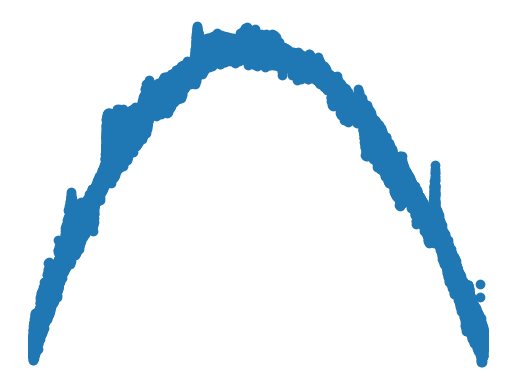

In [59]:
fig, ax = plt.subplots()
ax.scatter(cs2d[:,0],cs2d[:,1])
plt.axis('off')
plt.savefig('cs.png')

In [60]:
from skimage.util import invert
from skimage.filters import threshold_mean
img = Image.open('cs.png')
img = ImageOps.grayscale(img)
img2 = np.array(img)
imginv = invert(img2)
#thresh = threshold_mean(imginv)
#binary = imginv > thresh
#binary [0][:,[2,3]]

#sk = morphology.skeletonize(imginv)
sk = morphology.thin(imginv)
sk= Image.fromarray(sk)
sk.save("cs2.png")

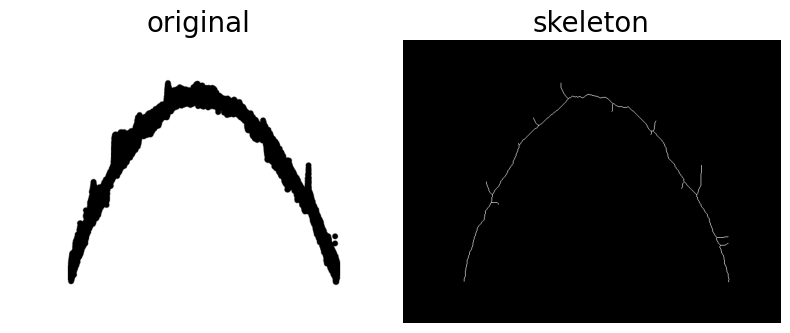

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(sk, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

In [62]:
#csp = o3d.geometry.PointCloud()
#csp.points = o3d.utility.Vector3dVector(cs)
#ch = o3d.geometry.PointCloud.compute_convex_hull(csp)
#ch,_ = csp.compute_convex_hull()

In [63]:
#chl = o3d.geometry.LineSet.create_from_triangle_mesh(ch)
#ch.compute_vertex_normals()

#pcl = ch.sample_points_poisson_disk(number_of_points=2000)
#o3d.visualization.draw_geometries([pcl])

#o3d.visualization.draw_geometries([chl])


In [64]:
#o3d.visualization.draw_geometries([ch])


In [65]:
hull = spatial.ConvexHull(cs2d, incremental=False, qhull_options=None)

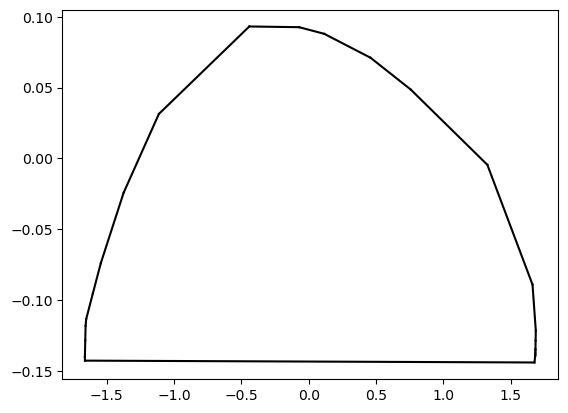

In [66]:
#plt.plot(cs2d[:,0], cs2d[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(cs2d[simplex, 0], cs2d[simplex, 1], 'k-')

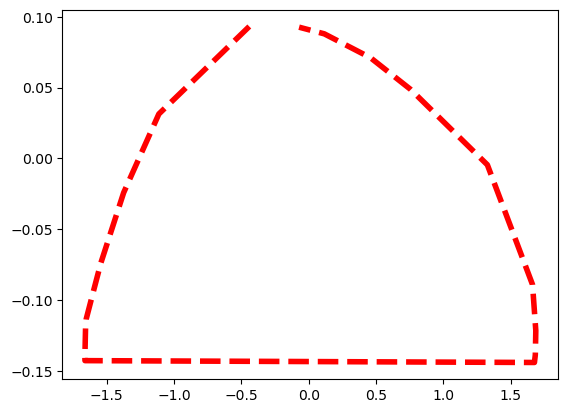

In [67]:
plt.plot(cs2d[hull.vertices,0], cs2d[hull.vertices,1], 'r--', lw=4)
#plt.plot(cs2d[hull.vertices[0],0], cs2d[hull.vertices[0],1], 'ro')
plt.show()

In [68]:
cshull = np.zeros((len(hull.vertices),3))
cshull[:,1] = cs2d[hull.vertices,0]
cshull[:,2] = cs2d[hull.vertices,1]
cshull3d = o3d.geometry.PointCloud()
cshull3d.points = o3d.utility.Vector3dVector(cshull)

In [69]:
#print("Testing kdtree in Open3D...")
#print("Load a point cloud and paint it gray.")

#pcd.paint_uniform_color([0.5, 0.5, 0.5])
#pcd_tree = o3d.geometry.KDTreeFlann(pcdc)

In [70]:
#distances1 = pcdc.compute_point_cloud_distance(cshull3d)

In [71]:
#distancesnp = np.asarray(distances1)

In [72]:
cshull

array([[ 0.        , -0.44159063,  0.09319186],
       [ 0.        , -1.11367416,  0.03139186],
       [ 0.        , -1.37530364, -0.02420814],
       [ 0.        , -1.54482559, -0.07390814],
       [ 0.        , -1.60375503, -0.09520814],
       [ 0.        , -1.653418  , -0.11340814],
       [ 0.        , -1.65800297, -0.11820814],
       [ 0.        , -1.66053352, -0.12860814],
       [ 0.        , -1.66325124, -0.14020814],
       [ 0.        , -1.66264271, -0.14280814],
       [ 0.        ,  1.67732038, -0.14410814],
       [ 0.        ,  1.68301923, -0.13940814],
       [ 0.        ,  1.68375026, -0.13870814],
       [ 0.        ,  1.68416356, -0.13730814],
       [ 0.        ,  1.68456465, -0.13560814],
       [ 0.        ,  1.68479708, -0.13460814],
       [ 0.        ,  1.68600709, -0.12870814],
       [ 0.        ,  1.68743661, -0.12160814],
       [ 0.        ,  1.66302407, -0.08910814],
       [ 0.        ,  1.32751522, -0.00450814],
       [ 0.        ,  0.75772915,  0.048

In [73]:
xyzindex = np.zeros((len(xyz[:,0]),4))
xyzindex[:, [0,1,2]] = xyz
numrotate= len(cshull[:,0])
updatedlist = list(range(0,numrotate-1))
updatedlist.insert(0,0)
cshullav = (cshull[:,[1,2]]+cshull[[updatedlist],:][0][:,[1,2]])/2

for a in range(len(xyz[:,0])-1):
    
    dist = cshullav-xyz[a,[1,2]]
    lengths = np.sum(dist**2, axis=1)
    xyzindex[a,3] = np.argmin(lengths) 

In [74]:
cshullav

array([[-0.44159063,  0.09319186],
       [-0.7776324 ,  0.06229186],
       [-1.2444889 ,  0.00359186],
       [-1.46006462, -0.04905814],
       [-1.57429031, -0.08455814],
       [-1.62858651, -0.10430814],
       [-1.65571048, -0.11580814],
       [-1.65926824, -0.12340814],
       [-1.66189238, -0.13440814],
       [-1.66294697, -0.14150814],
       [ 0.00733884, -0.14345814],
       [ 1.68016981, -0.14175814],
       [ 1.68338474, -0.13905814],
       [ 1.68395691, -0.13800814],
       [ 1.68436411, -0.13645814],
       [ 1.68468087, -0.13510814],
       [ 1.68540209, -0.13165814],
       [ 1.68672185, -0.12515814],
       [ 1.67523034, -0.10535814],
       [ 1.49526964, -0.04680814],
       [ 1.04262218,  0.02209186],
       [ 0.60860612,  0.05989186],
       [ 0.28763149,  0.07954186],
       [ 0.02206811,  0.09034186]])

In [75]:
cshull

array([[ 0.        , -0.44159063,  0.09319186],
       [ 0.        , -1.11367416,  0.03139186],
       [ 0.        , -1.37530364, -0.02420814],
       [ 0.        , -1.54482559, -0.07390814],
       [ 0.        , -1.60375503, -0.09520814],
       [ 0.        , -1.653418  , -0.11340814],
       [ 0.        , -1.65800297, -0.11820814],
       [ 0.        , -1.66053352, -0.12860814],
       [ 0.        , -1.66325124, -0.14020814],
       [ 0.        , -1.66264271, -0.14280814],
       [ 0.        ,  1.67732038, -0.14410814],
       [ 0.        ,  1.68301923, -0.13940814],
       [ 0.        ,  1.68375026, -0.13870814],
       [ 0.        ,  1.68416356, -0.13730814],
       [ 0.        ,  1.68456465, -0.13560814],
       [ 0.        ,  1.68479708, -0.13460814],
       [ 0.        ,  1.68600709, -0.12870814],
       [ 0.        ,  1.68743661, -0.12160814],
       [ 0.        ,  1.66302407, -0.08910814],
       [ 0.        ,  1.32751522, -0.00450814],
       [ 0.        ,  0.75772915,  0.048

In [76]:
xyzindex

array([[-3.25048127e+00,  1.28141254e+00, -4.21081445e-02,
         1.90000000e+01],
       [-3.34972014e+00,  1.24035773e+00, -3.76081445e-02,
         2.00000000e+01],
       [-3.32115971e+00,  9.14338113e-01,  1.69918555e-02,
         2.00000000e+01],
       ...,
       [ 2.97977158e+00, -1.65501189e+00, -1.33108144e-01,
         8.00000000e+00],
       [ 3.06095072e+00, -1.63846783e+00, -1.29908144e-01,
         7.00000000e+00],
       [ 2.87304374e+00, -1.65708549e+00, -1.31608144e-01,
         0.00000000e+00]])

In [77]:
cshullflat = cshull
cshull2 = np.append(cshull,[[0,0,0]],axis = 0)
no = np.shape(cshull)[0]
a=0
xyzflat = xyzindex
print("Number of segments to unfold",no)
for a in range(no-1):
    theta = math.atan((cshull2[a,1]-cshull2[a-1,1])/(cshull2[a,2]-cshull2[a-1,2]))
    #r = (((cshull2[a,1]-cshull2[a-1,1])**2)+((cshull2[a,2]-cshull2[a-1,2])**2)
    R = np.array([[math.cos(theta), math.sin(theta)],[-math.sin(theta),math.cos(theta)]])
    temp = cshull2[a:no,[1,2]]-cshull2[a-1,[1,2]]
    new = np.matmul(temp,R)+ cshull2[a-1,[1,2]]
    cshull2[a:no,[1,2]]= new #np.matmul(temp,R)+ cshull2[a-1,[1,2]]
    print("calculated transform",a)
    tempxyz = xyzflat[xyzflat[:,3]>=a,1:3]-cshull2[a-1,[1,2]]
    newxyz = np.matmul(tempxyz,R)+ cshull2[a-1,[1,2]]
    xyzflat[xyzflat[:,3]>=a,1:3]= newxyz 
    print("segment transformed",a)

Number of segments to unfold 24
calculated transform 0
segment transformed 0
calculated transform 1
segment transformed 1
calculated transform 2
segment transformed 2
calculated transform 3
segment transformed 3
calculated transform 4
segment transformed 4
calculated transform 5
segment transformed 5
calculated transform 6
segment transformed 6
calculated transform 7
segment transformed 7
calculated transform 8
segment transformed 8
calculated transform 9
segment transformed 9
calculated transform 10
segment transformed 10
calculated transform 11
segment transformed 11
calculated transform 12
segment transformed 12
calculated transform 13
segment transformed 13
calculated transform 14
segment transformed 14
calculated transform 15
segment transformed 15
calculated transform 16
segment transformed 16
calculated transform 17
segment transformed 17
calculated transform 18
segment transformed 18
calculated transform 19
segment transformed 19
calculated transform 20
segment transformed 20
c

In [78]:
newxyz.shape

(205798, 2)

In [79]:
xyzflat[a:no,1:3].shape

(2, 2)

In [80]:
xyzflat[:,3]>=a

array([False, False, False, ..., False, False, False])

In [81]:
b = xyzflat[xyzflat[:,3]>=a]

In [82]:
b[:,[1,2]]

array([[ 9.75425539e-03,  6.41211583e+00],
       [ 1.10917351e-02,  6.61704211e+00],
       [ 6.44406381e-03,  6.49165397e+00],
       ...,
       [-3.75238566e-04,  6.64866714e+00],
       [ 4.18888940e-03,  6.54973573e+00],
       [ 1.35955848e-02,  6.36657218e+00]])

In [83]:
xyzflat.shape

(1112805, 4)

In [84]:
b.shape

(205798, 4)

In [85]:
    visualise = o3d.geometry.PointCloud()
    visualise.points = o3d.utility.Vector3dVector(xyzflat[:,[0,1,2]])
    visualise.colors = pcd.colors

In [86]:
o3d.io.write_point_cloud("testflatten.pcd",visualise)

True

In [87]:
np.shape(xyzflat[:,0])

(1112805,)

In [88]:
xyzflat

array([[-3.25048127e+00, -4.77309591e-02,  5.50587361e+00,
         1.90000000e+01],
       [-3.34972014e+00, -4.10591713e-02,  5.55406638e+00,
         2.00000000e+01],
       [-3.32115971e+00, -1.70037199e-02,  5.88375000e+00,
         2.00000000e+01],
       ...,
       [ 2.97977158e+00, -6.40254261e-03,  1.70638200e+00,
         8.00000000e+00],
       [ 3.06095072e+00, -2.17474829e-02,  1.69930645e+00,
         7.00000000e+00],
       [ 2.87304374e+00, -4.70941288e-01,  1.59419802e+00,
         0.00000000e+00]])

In [89]:
np.shape(las.x)

(1112805,)

In [90]:
xyzflat[:,0]

array([-3.25048127, -3.34972014, -3.32115971, ...,  2.97977158,
        3.06095072,  2.87304374])

In [91]:
las.x

<ScaledArrayView([375775.1488 375775.1909 375775.5166 ... 375778.0193 375778.0019
 375778.0225])>

In [92]:
#xyzflat = np.trunc(xyzflat*(10**0))/(10**0)
xyzflat

array([[-3.25048127e+00, -4.77309591e-02,  5.50587361e+00,
         1.90000000e+01],
       [-3.34972014e+00, -4.10591713e-02,  5.55406638e+00,
         2.00000000e+01],
       [-3.32115971e+00, -1.70037199e-02,  5.88375000e+00,
         2.00000000e+01],
       ...,
       [ 2.97977158e+00, -6.40254261e-03,  1.70638200e+00,
         8.00000000e+00],
       [ 3.06095072e+00, -2.17474829e-02,  1.69930645e+00,
         7.00000000e+00],
       [ 2.87304374e+00, -4.70941288e-01,  1.59419802e+00,
         0.00000000e+00]])

In [93]:
las.x[0] = 370000

In [97]:
outfile = laspy.create(file_version="1.2", point_format=3)

#outfile = laspy.file.File("new_path.las", header=file.header, mode="w")
allx =  xyzflat[:,2]
ally =  xyzflat[:,0]
allz =  xyzflat[:,1]
xmin = np.floor(np.min(allx))
ymin = np.floor(np.min(ally))
zmin = np.floor(np.min(allz))

outfile.header.offset = [xmin,ymin,zmin] # how to know what this should be?
outfile.header.scale = [0.001,0.001,0.001] # how to know what this should be?

outfile.x = allx
outfile.y = ally
outfile.z = allz
outfile.write("testflatten.las")
#outfile.close()

In [ ]:
#las.write("testflatten.las")

In [ ]:
o3d.visualization.draw_geometries([visualise])

In [ ]:
allx

array([-3., -3., -3., ...,  2.,  3.,  2.])

In [ ]:
ally.max()

-0.0

In [ ]:
allz.max()

7.0

In [ ]:
allz.min()

0.0